# 숫자 손글씨 인식 모델 (PyTorch)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드 및 정규화
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# train_dataset 크기 출력
print("Train Dataset 크기 :", len(train_dataset))
print("Test Dataset 크기 :", len(test_dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Train Dataset 크기 : 60000
Test Dataset 크기 : 10000


## 데이터 확인

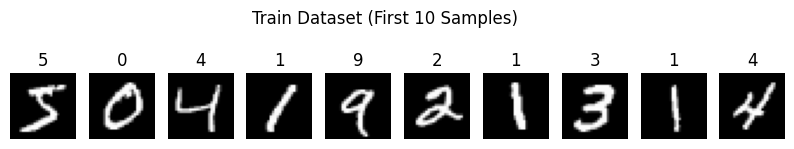

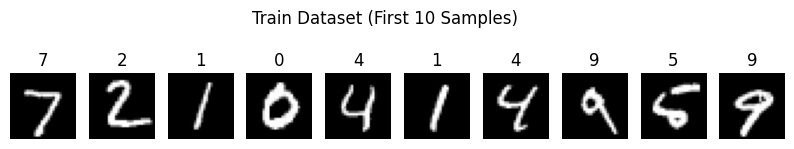

In [4]:
# 학습용 데이터 10개 확인
plt.figure(figsize=(10, 2))
for i in range(10):
    image, label = train_dataset[i] # 데이터와 레이블
    image = image.squeeze() # 채널 제거(1x28x28 -> 28x28)
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    plt.axis("off")
plt.suptitle("Train Dataset (First 10 Samples)")
plt.show()

# 테스트용 데이터 10개 확인
plt.figure(figsize=(10, 2))
for i in range(10):
    image, label = test_dataset[i] # 데이터와 레이블
    image = image.squeeze() # 채널 제거(1x28x28 -> 28x28)
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    plt.axis("off")
plt.suptitle("Train Dataset (First 10 Samples)")
plt.show()

## CNN 모델 정의

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1) # 28x28x1 -> 28x28x32
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # 28x28x32 -> 14x14x32
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 14x14x32 -> 14x14x64
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 14x14x64 -> 7x7x64
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1) # 7x7x64 -> 7x7x64

        # Flatten된 크기 계산 : 7x7x64
        self.flattened_size = 7 * 7 * 64
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1) # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## 모델 생성 / 학습

Epoch : 1, Loss : 0.5085872958765737
Epoch : 2, Loss : 0.13866474164097803
학습 완료


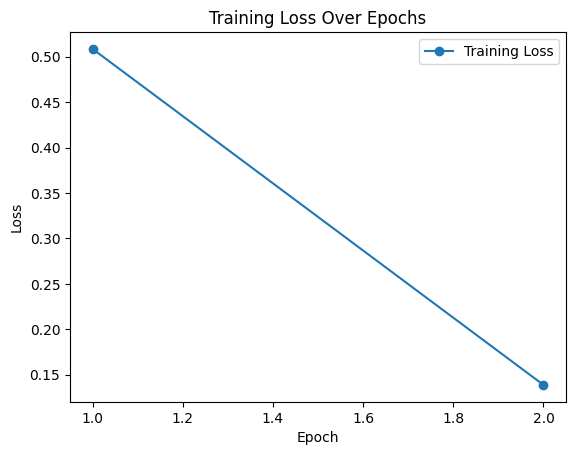

In [9]:
# 모델 초기화
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 모델 학습
epochs = 2
loss_history = [] # Loss 기록용 리스트

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Epoch별 평균 Loss 계산 및 저장
    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f"Epoch : {epoch+1}, Loss : {epoch_loss}")

print("학습 완료")

# Loss 그래프 시각화
plt.plot(range(1, epochs+1), loss_history, marker="o", label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

## 검증

In [8]:
# 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy : {100 * correct / total:.2f}%")

Accuracy : 96.62%


## 학습된 모델 저장

In [14]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    "loss": loss.item(),
}, "number_recognition_model.pth")

## 손글씨 이미지 인식

Model State Dict : OrderedDict({'conv1.weight': tensor([[[[ 0.3602, -0.3057,  0.0786],
          [ 0.1413,  0.1284, -0.2484],
          [ 0.3626, -0.0100,  0.0300]]],


        [[[-0.3304,  0.1026,  0.0353],
          [-0.1777, -0.2871,  0.1898],
          [-0.1764, -0.0714, -0.2027]]],


        [[[ 0.1692,  0.1742,  0.2416],
          [ 0.0423,  0.3133,  0.3513],
          [-0.3224,  0.0931, -0.0945]]],


        [[[-0.1195, -0.1410, -0.2914],
          [-0.0983,  0.0134, -0.0028],
          [-0.1406, -0.0093, -0.0412]]],


        [[[ 0.1740, -0.0007,  0.1753],
          [-0.1694,  0.2225,  0.2429],
          [ 0.0305,  0.2276, -0.1430]]],


        [[[ 0.2479,  0.2612,  0.2930],
          [ 0.3349,  0.1425, -0.2675],
          [ 0.0191, -0.2571,  0.0758]]],


        [[[ 0.1865, -0.0992, -0.1832],
          [ 0.2194,  0.0935,  0.1341],
          [ 0.1491, -0.2323,  0.0880]]],


        [[[-0.2703,  0.0311,  0.1902],
          [ 0.1084, -0.3288,  0.3646],
          [ 0.0483, -0.0995

C:\Users\jypar\AppData\Local\Temp\ipykernel_14328\93454410.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("number_recognition_model.pth")


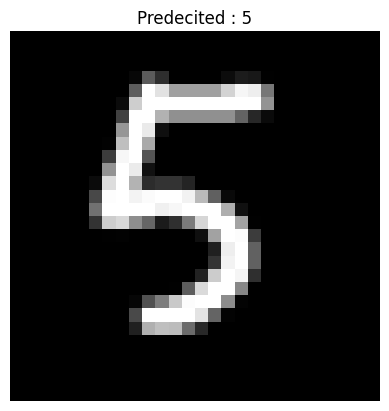

In [ ]:
from PIL import Image

image_path = "test.png"

# 손글씨 이미지 인식 함수
def recognize_handwritten_digit(image_path):
    # 이미지를 열고 28x28로 크기 조정
    img = Image.open(image_path).convert("L") # 흑백으로 변환
    img = img.resize((28, 28)) # 모델의 입력 크기 맞추기
    img = transforms.ToTensor()(img) # Tensor로 변환
    img = transforms.Normalize((0.5,), (0.5,))(img) # 정규화

    img = img.unsqueeze(0) # 배치 차원 추가 (1, 1, 28, 28)

    # 모델 불러오기
    checkpoint = torch.load("number_recognition_model.pth")
    model = CNN()
    optimizer = optim.SGD(model.parameters(), lr=0.1) # 옵티마이저 재생성

    # 저장된 정보 확인
    print("Model State Dict :", checkpoint["model_state_dict"]) # 모델의 가중치 파라미터
    print("Optimizer State Dict :", checkpoint["optimizer_state_dict"]) # 옵티마이저의 상태
    print(checkpoint["loss"]) # 마지막 Epoch의 Loss 값

    # 저장된 상태를 모델과 옵티마이저에 로드
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

    # 모델을 평가 모드로 설정
    model.eval()

     # 모델을 사용하여 예측
    with torch.no_grad():
        output = model(img)
        _, predicted = torch.max(output, 1) # 가장 큰 값을 가진 클래스를 예측

    print(f"Preficted Digit : {predicted.item()}")

    # 이미지를 시각화
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Predecited : {predicted.item()}")
    plt.axis("off")
    plt.show()

# 사용자가 작성한 손글씨 파일 경로 지정
recognize_handwritten_digit("test.png")

## 모델 결과 요약

In [44]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5             [-1, 64, 7, 7]          36,928
            Linear-6                   [-1, 64]         200,768
            Linear-7                   [-1, 10]             650
Total params: 257,162
Trainable params: 257,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.38
Params size (MB): 0.98
Estimated Total Size (MB): 1.37
----------------------------------------------------------------
